In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape
#这里注意下是784个pixel training的时候shape要一致

(55000, 784)

### Genetor

In [4]:
def generator(z):
    with tf.variable_scope("generator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = z, units = 128 , activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        #cov_2 = tf.layers.dense(inputs = cov_1, units = 256, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        #cov_3 = tf.layers.dense(inputs = cov_2, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        output_1 = tf.layers.dense(inputs = cov_1, units = 784, activation = tf.nn.tanh, kernel_initializer = init, use_bias = True)
        
        return output_1

### Discriminator

In [5]:
def discriminator(x):
    with tf.variable_scope("discriminator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = x, units = 384 , activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_2 = tf.layers.dense(inputs = cov_1, units = 256, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_3 = tf.layers.dense(inputs = cov_2, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        logit = tf.layers.dense(inputs = cov_3, units = 1, kernel_initializer = init, use_bias = True)
        
        return logit

### Loss Function

In [6]:
x = tf.placeholder(tf.float32,shape = [None, 784])
z = tf.placeholder(tf.float32,shape = [None,100])

In [7]:
G_sample = generator(z) #取得生成器的生成结果
D_logit_real = discriminator(x) #取得判别器判别的真实手写数字的结果
D_logit_fake = discriminator(G_sample) #取得判别器判别的生成的手写数字的结果
 
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real))) #对判别器对真实样本的判别结果计算误差(将结果与1比较)
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake))) #对判别器对虚假样本(即生成器生成的手写数字)的判别结果计算误差(将结果与0比较)
d_loss = D_loss_real + D_loss_fake #判别器的误差
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


### Optimizer

In [8]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator')
D_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(d_loss,var_list = D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(g_loss,var_list = G_vars)

### Training

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

  0%|          | 0/50000 [00:00<?, ?it/s]

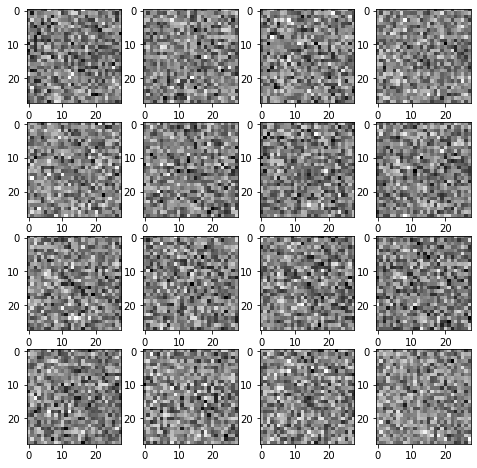


ITER:0
D_cur_loss:1.369560718536377
G_cur_loss:0.8636264801025391



  2%|▏         | 996/50000 [00:25<18:15, 44.74it/s]  

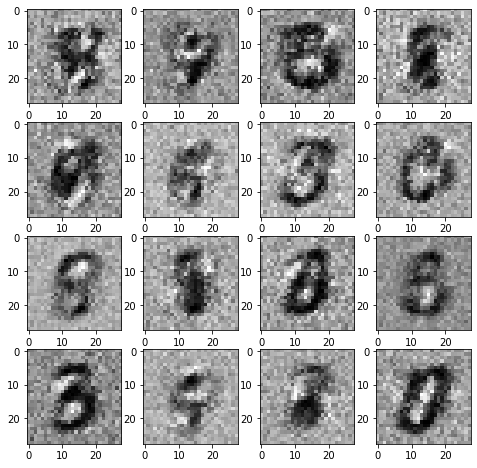


ITER:1000
D_cur_loss:0.5282760858535767
G_cur_loss:6.522760391235352



  4%|▍         | 1999/50000 [00:53<20:26, 39.13it/s]  

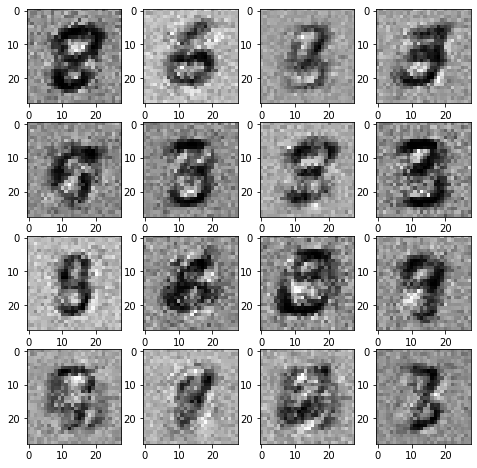


ITER:2000
D_cur_loss:0.25960883498191833
G_cur_loss:4.211302280426025



  6%|▌         | 3000/50000 [01:24<24:13, 32.33it/s]  

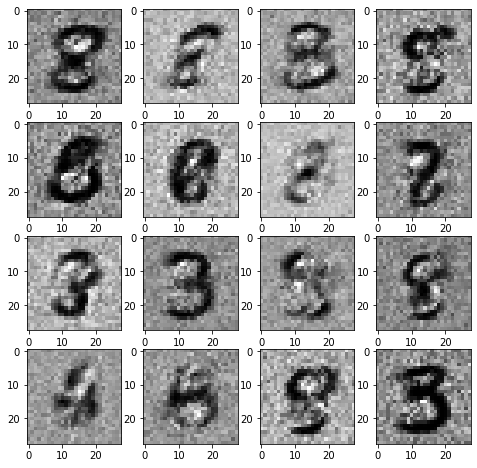


ITER:3000
D_cur_loss:0.23600424826145172
G_cur_loss:4.804226875305176



  8%|▊         | 3998/50000 [01:54<19:23, 39.53it/s]  

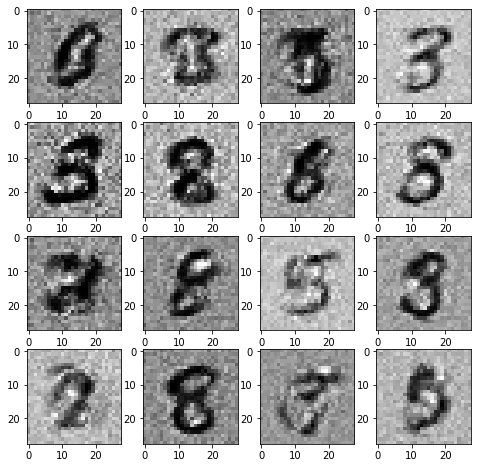


ITER:4000
D_cur_loss:0.18036767840385437
G_cur_loss:4.802435874938965



 10%|▉         | 4998/50000 [02:21<18:52, 39.74it/s]  

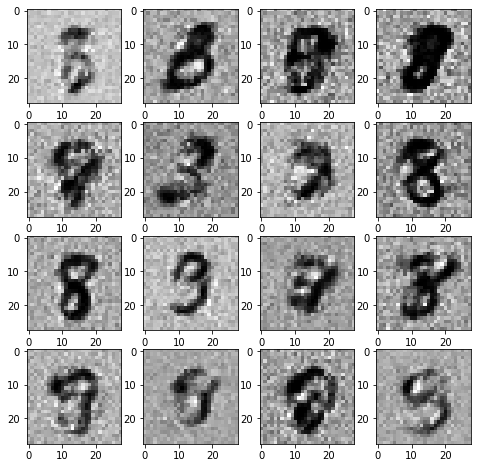


ITER:5000
D_cur_loss:0.19539612531661987
G_cur_loss:6.754664421081543



 12%|█▏        | 5999/50000 [02:54<20:07, 36.43it/s]  

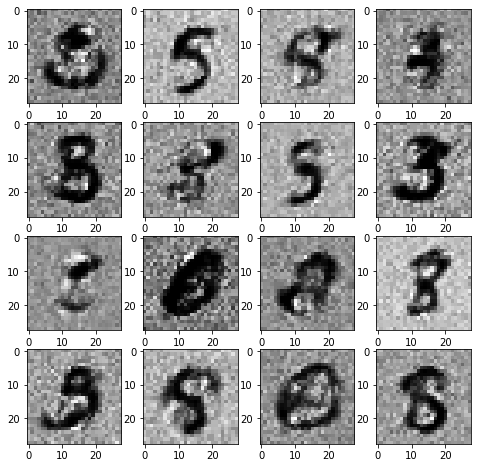


ITER:6000
D_cur_loss:0.19637522101402283
G_cur_loss:5.1691741943359375



 14%|█▍        | 6997/50000 [03:28<19:03, 37.61it/s]  

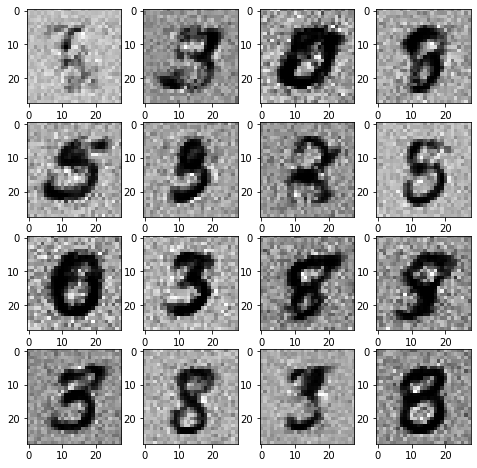


ITER:7000
D_cur_loss:0.12346227467060089
G_cur_loss:5.364256858825684



 16%|█▌        | 7999/50000 [03:56<19:08, 36.58it/s]  

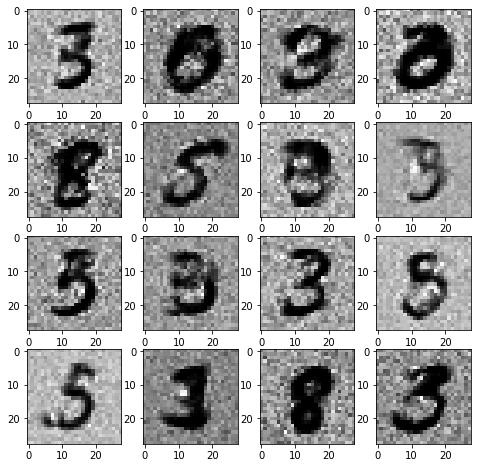


ITER:8000
D_cur_loss:0.1959836483001709
G_cur_loss:5.737760543823242



 18%|█▊        | 8997/50000 [04:24<16:58, 40.26it/s]  

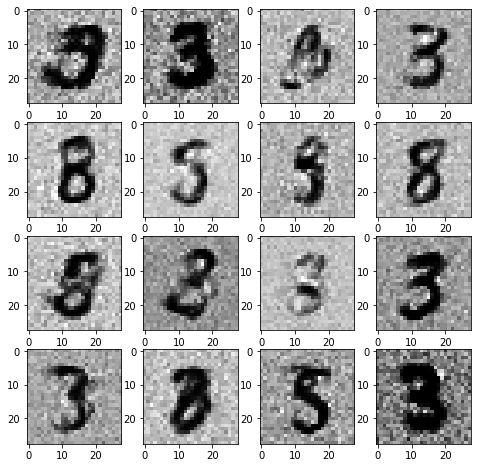


ITER:9000
D_cur_loss:0.2713012397289276
G_cur_loss:4.962514877319336



 20%|█▉        | 9997/50000 [04:51<16:19, 40.85it/s]  

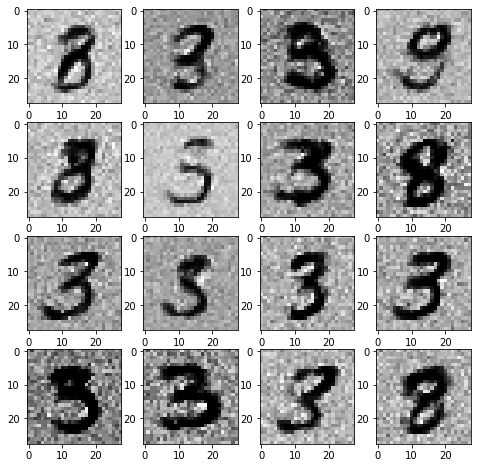


ITER:10000
D_cur_loss:0.14100013673305511
G_cur_loss:5.6645002365112305



 22%|██▏       | 10997/50000 [05:23<19:55, 32.63it/s]  

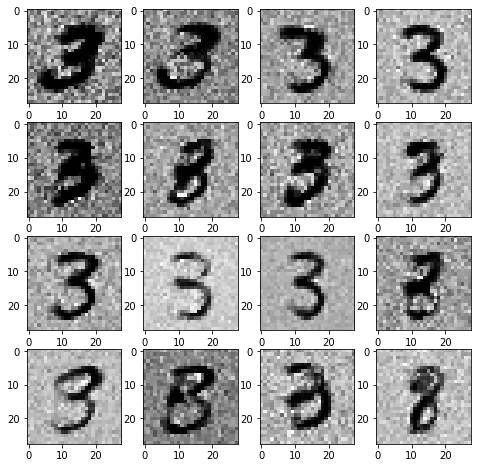


ITER:11000
D_cur_loss:0.167328342795372
G_cur_loss:5.624446868896484



 24%|██▍       | 12000/50000 [06:00<23:35, 26.84it/s]  

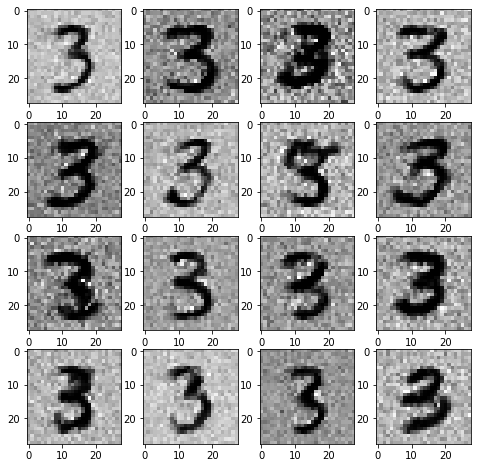


ITER:12000
D_cur_loss:0.07258722186088562
G_cur_loss:5.161248207092285



 26%|██▌       | 12999/50000 [06:33<16:09, 38.17it/s]  

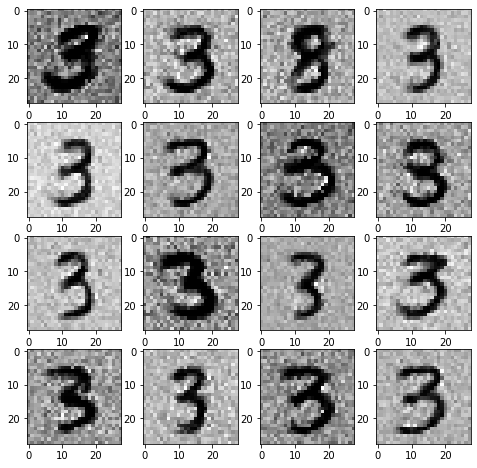


ITER:13000
D_cur_loss:0.0350293330848217
G_cur_loss:5.730134010314941



 28%|██▊       | 13999/50000 [07:02<19:32, 30.71it/s]  

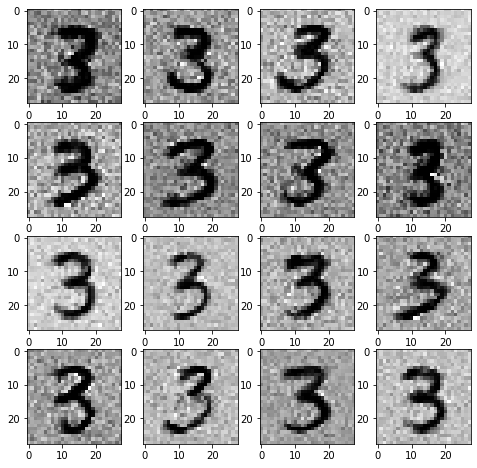


ITER:14000
D_cur_loss:0.06540603190660477
G_cur_loss:5.024675369262695



 30%|██▉       | 14998/50000 [07:34<15:16, 38.18it/s]  

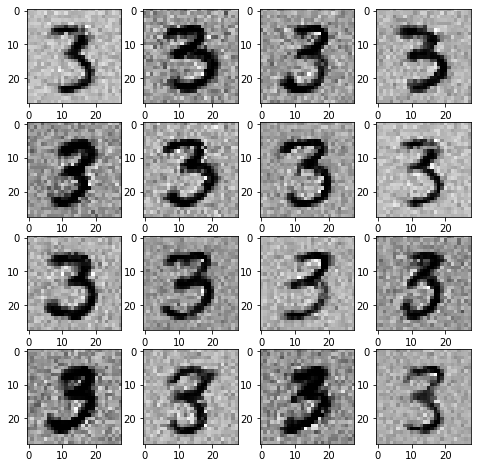


ITER:15000
D_cur_loss:0.13559888303279877
G_cur_loss:5.137138366699219



 32%|███▏      | 15999/50000 [08:04<15:14, 37.17it/s]  

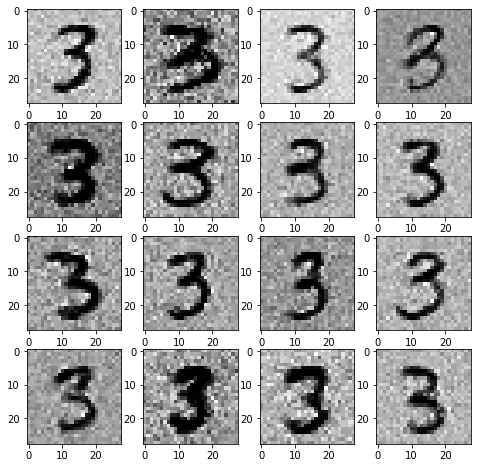


ITER:16000
D_cur_loss:0.04841230437159538
G_cur_loss:5.351062774658203



 34%|███▍      | 16998/50000 [08:37<21:47, 25.25it/s]  

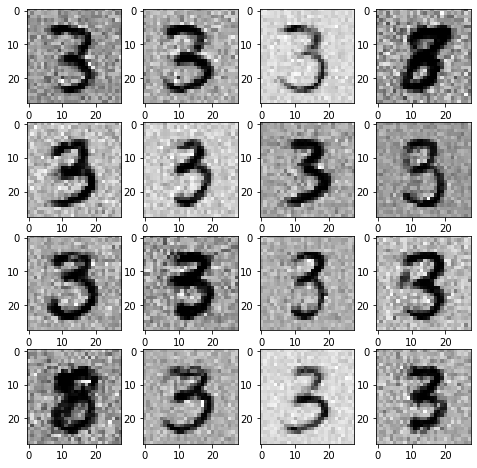


ITER:17000
D_cur_loss:0.07684558629989624
G_cur_loss:5.721549987792969



 36%|███▌      | 17998/50000 [09:08<13:03, 40.85it/s]  

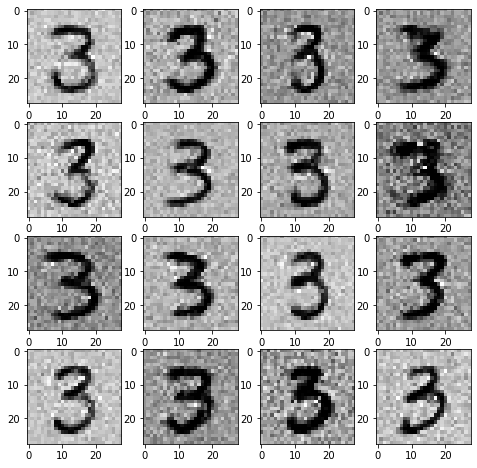


ITER:18000
D_cur_loss:0.08808725327253342
G_cur_loss:5.228350639343262



 38%|███▊      | 18997/50000 [09:41<13:59, 36.92it/s]  

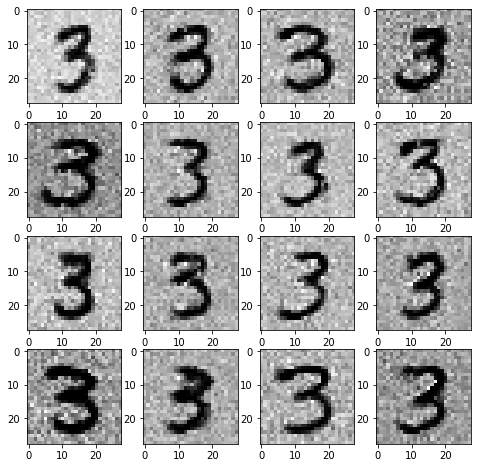


ITER:19000
D_cur_loss:0.05596911162137985
G_cur_loss:5.998808860778809



 40%|███▉      | 19998/50000 [10:17<19:26, 25.72it/s]  

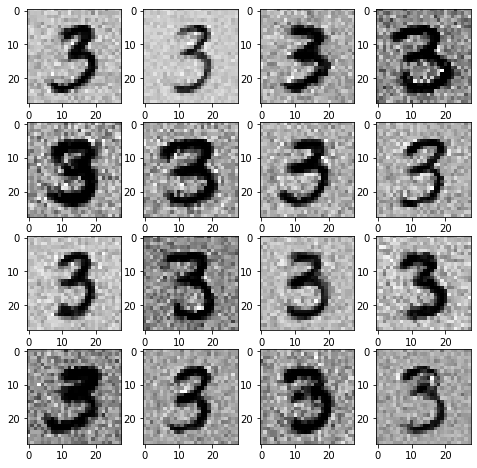


ITER:20000
D_cur_loss:0.02834903821349144
G_cur_loss:5.657222270965576



 42%|████▏     | 20998/50000 [10:50<13:27, 35.91it/s]  

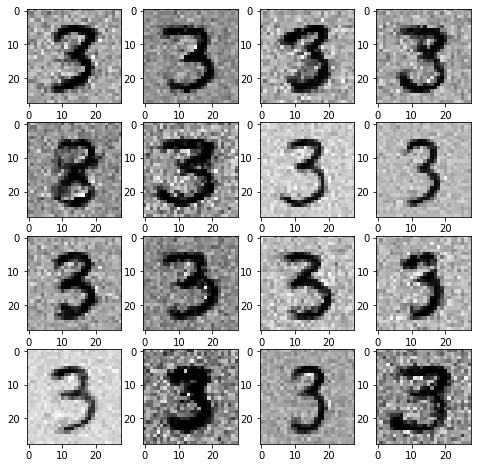


ITER:21000
D_cur_loss:0.015822283923625946
G_cur_loss:5.805575370788574



 44%|████▍     | 21996/50000 [11:17<10:18, 45.29it/s]  

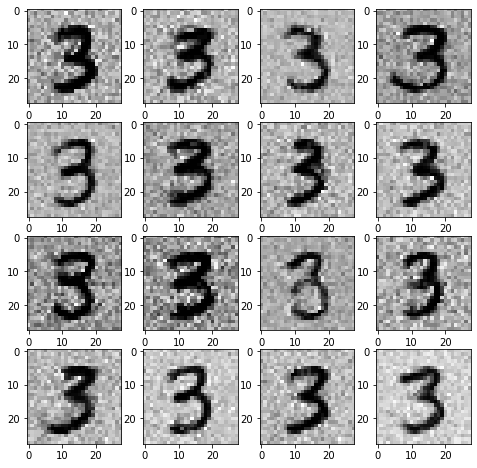


ITER:22000
D_cur_loss:0.0840163379907608
G_cur_loss:6.511158466339111



 46%|████▌     | 22998/50000 [11:42<09:57, 45.20it/s]  

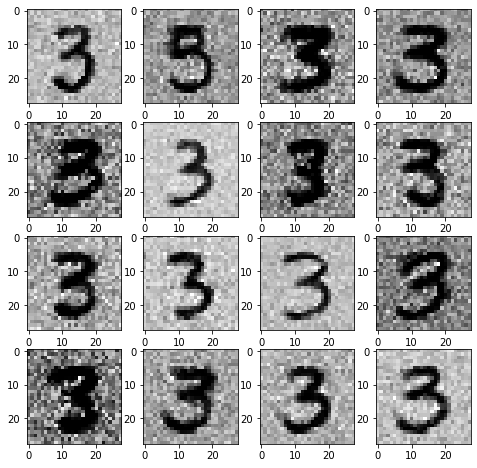


ITER:23000
D_cur_loss:0.07707715779542923
G_cur_loss:6.85118293762207



 48%|████▊     | 23998/50000 [12:05<08:46, 49.42it/s]  

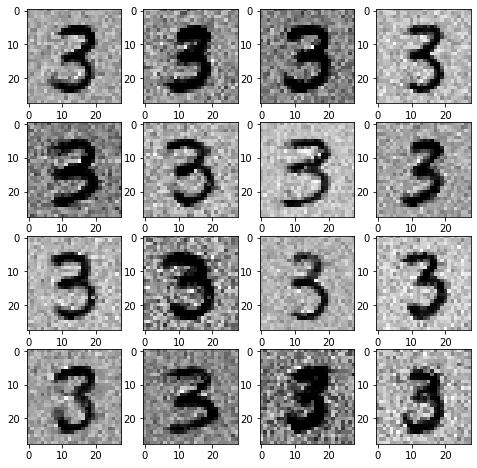


ITER:24000
D_cur_loss:0.09007146209478378
G_cur_loss:6.378635883331299



 50%|████▉     | 24996/50000 [12:27<08:19, 50.06it/s]

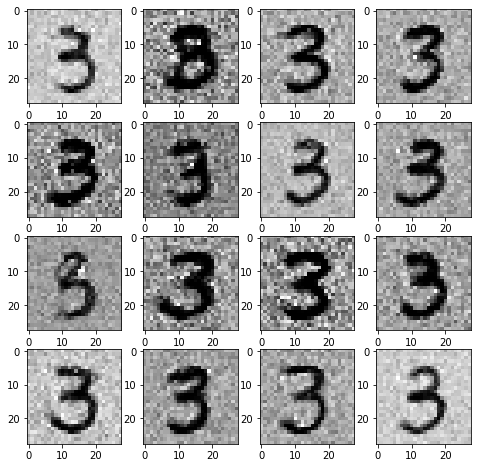


ITER:25000
D_cur_loss:0.07941737771034241
G_cur_loss:6.595571517944336



 52%|█████▏    | 25998/50000 [12:53<09:45, 40.97it/s]

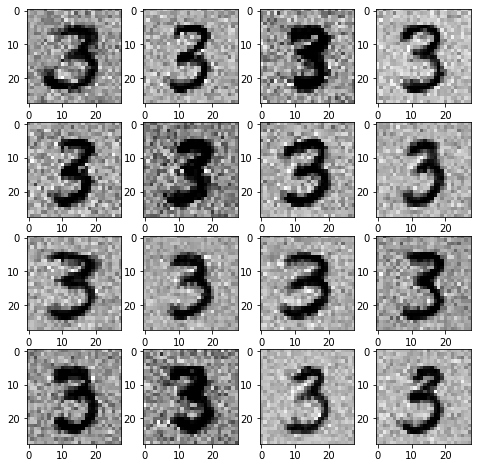


ITER:26000
D_cur_loss:0.04043004289269447
G_cur_loss:7.219355583190918



 54%|█████▍    | 26998/50000 [13:16<07:52, 48.63it/s]

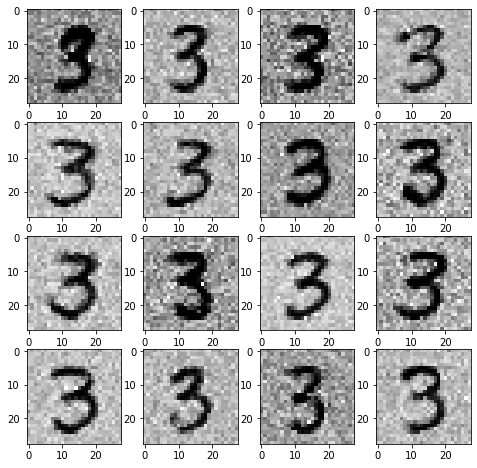


ITER:27000
D_cur_loss:0.006645095534622669
G_cur_loss:6.4375224113464355



 56%|█████▌    | 27995/50000 [13:39<07:43, 47.52it/s]

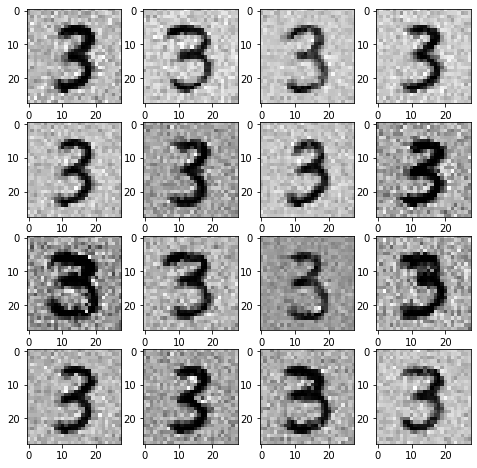


ITER:28000
D_cur_loss:0.0740179792046547
G_cur_loss:6.520298004150391



 58%|█████▊    | 28999/50000 [14:05<13:07, 26.66it/s]

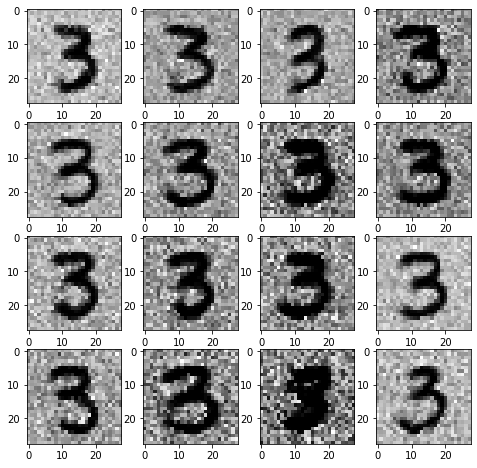


ITER:29000
D_cur_loss:0.006639193277806044
G_cur_loss:7.110421180725098



 60%|█████▉    | 29999/50000 [14:31<06:46, 49.16it/s]  

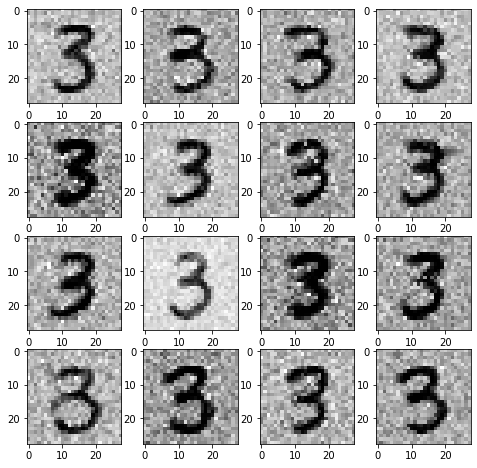


ITER:30000
D_cur_loss:0.03210047259926796
G_cur_loss:7.410608291625977



 62%|██████▏   | 31000/50000 [15:00<07:18, 43.35it/s]

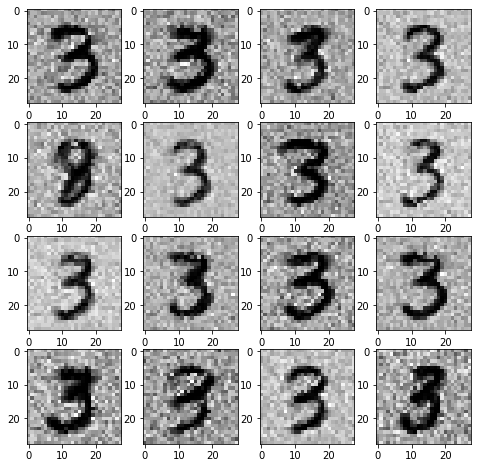


ITER:31000
D_cur_loss:0.015532688237726688
G_cur_loss:7.777765274047852



 64%|██████▍   | 31998/50000 [15:24<06:40, 45.00it/s]

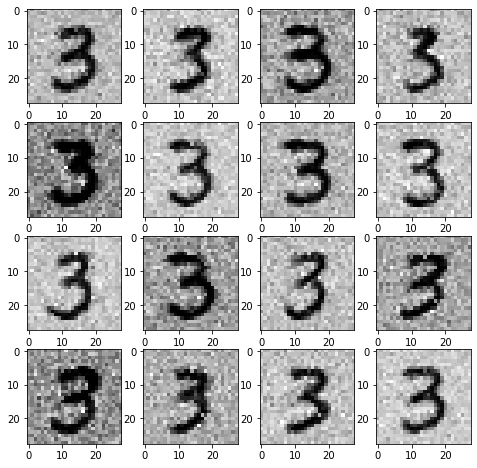


ITER:32000
D_cur_loss:0.003641928546130657
G_cur_loss:7.305141448974609



 66%|██████▌   | 32996/50000 [15:49<05:54, 47.96it/s]

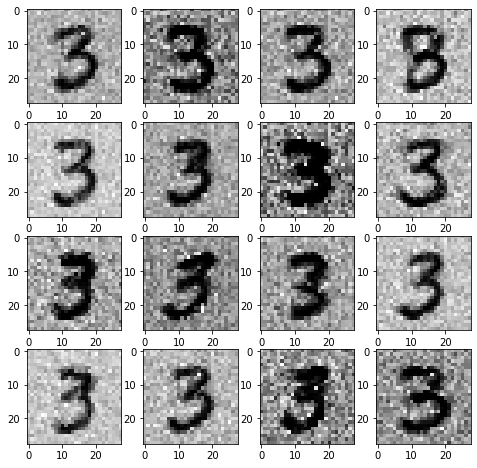


ITER:33000
D_cur_loss:0.002428376814350486
G_cur_loss:8.264421463012695



 68%|██████▊   | 33999/50000 [16:12<08:22, 31.87it/s]

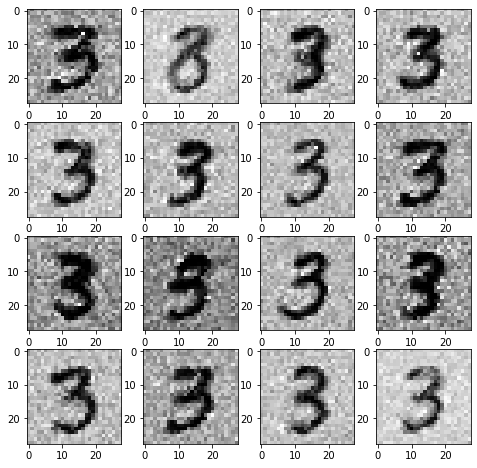


ITER:34000
D_cur_loss:0.013672523200511932
G_cur_loss:8.322053909301758



 70%|██████▉   | 34997/50000 [16:40<08:33, 29.24it/s]

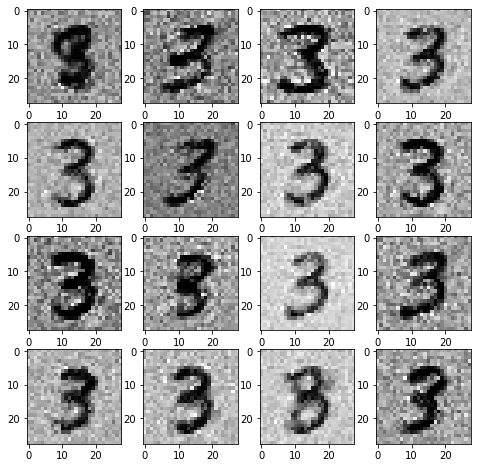


ITER:35000
D_cur_loss:0.03756488859653473
G_cur_loss:7.874833583831787



 72%|███████▏  | 35999/50000 [17:08<06:57, 33.53it/s]

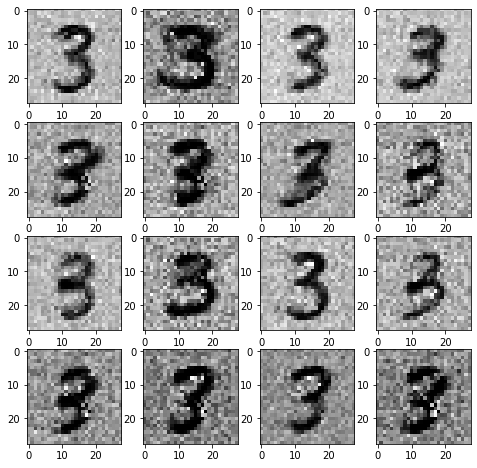


ITER:36000
D_cur_loss:0.01270624715834856
G_cur_loss:7.60316276550293



 74%|███████▍  | 36999/50000 [17:37<07:12, 30.04it/s]

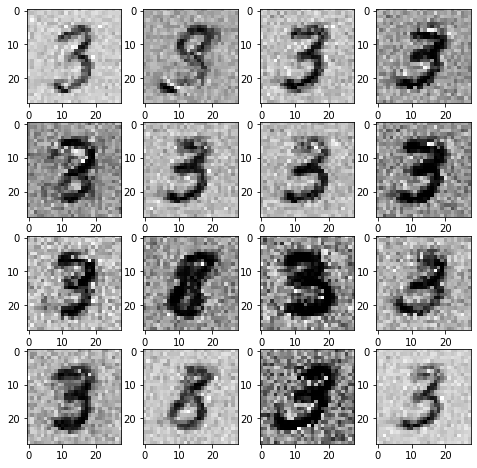


ITER:37000
D_cur_loss:0.07630597800016403
G_cur_loss:7.3496880531311035



 76%|███████▌  | 38000/50000 [18:06<06:17, 31.80it/s]

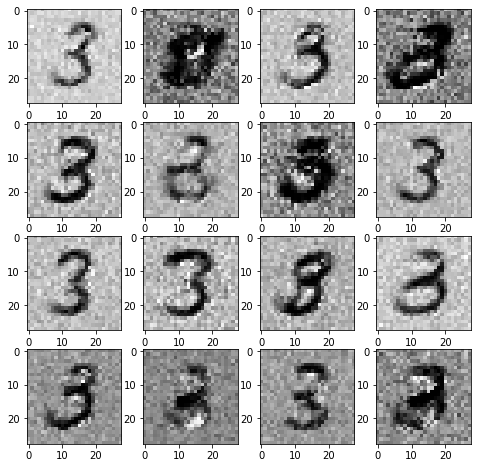


ITER:38000
D_cur_loss:0.1275298297405243
G_cur_loss:6.196969032287598



 78%|███████▊  | 38997/50000 [18:34<04:44, 38.69it/s]

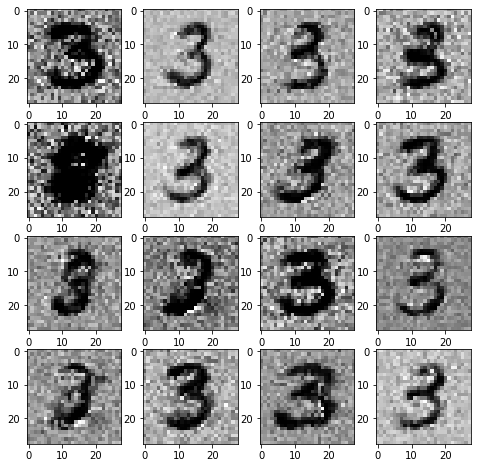


ITER:39000
D_cur_loss:0.06876631081104279
G_cur_loss:6.622800350189209



 80%|███████▉  | 39999/50000 [19:03<04:22, 38.06it/s]

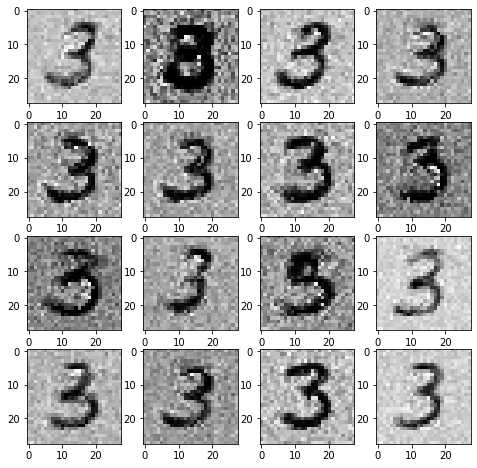


ITER:40000
D_cur_loss:0.03597573935985565
G_cur_loss:5.761919975280762



 82%|████████▏ | 40998/50000 [19:33<03:05, 48.48it/s]

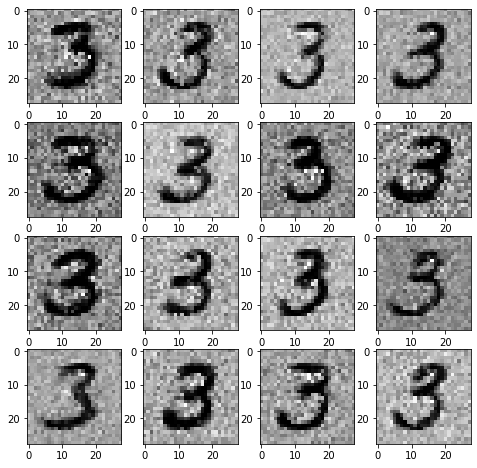


ITER:41000
D_cur_loss:0.02964574098587036
G_cur_loss:6.292859077453613



 84%|████████▍ | 41997/50000 [19:58<03:13, 41.45it/s]

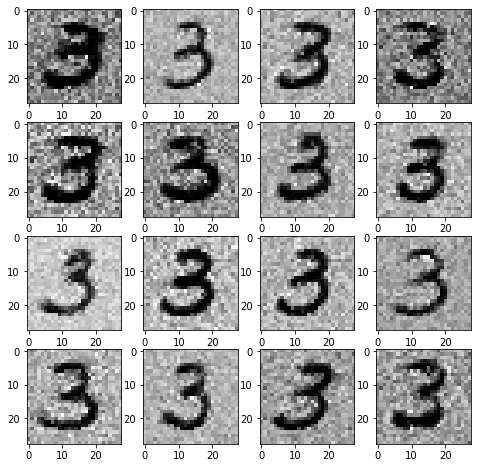


ITER:42000
D_cur_loss:0.014947060495615005
G_cur_loss:6.574069499969482



 86%|████████▌ | 42999/50000 [20:23<02:37, 44.49it/s]

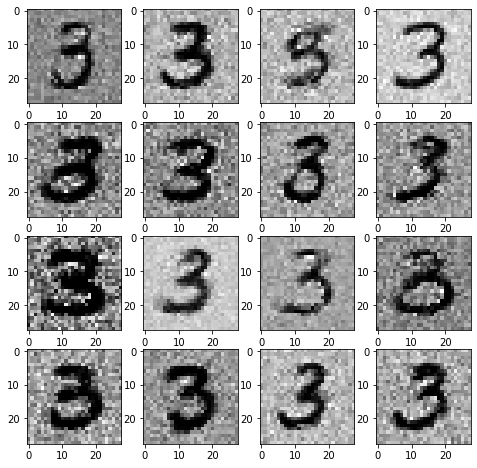


ITER:43000
D_cur_loss:0.03578370809555054
G_cur_loss:6.9299821853637695



 88%|████████▊ | 44000/50000 [20:46<02:10, 45.91it/s]

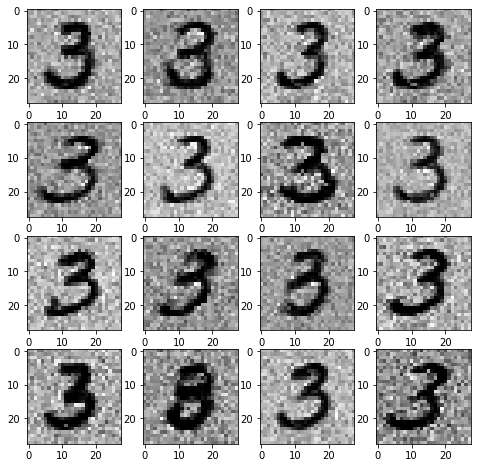


ITER:44000
D_cur_loss:0.03294219821691513
G_cur_loss:6.893108367919922



 90%|████████▉ | 44997/50000 [21:08<01:36, 52.06it/s]

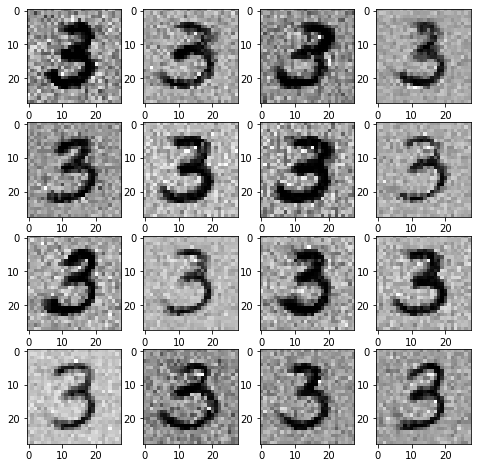


ITER:45000
D_cur_loss:0.017321746796369553
G_cur_loss:6.295253753662109



 92%|█████████▏| 45996/50000 [21:33<01:58, 33.70it/s]

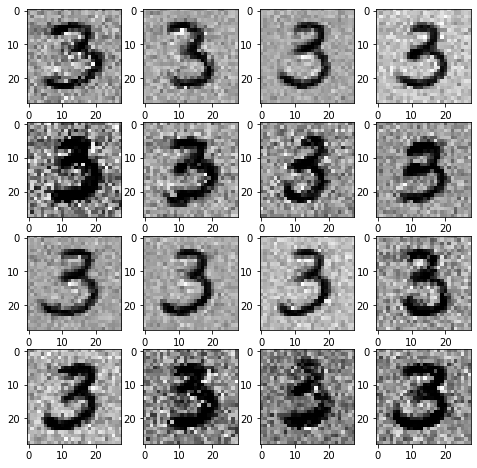


ITER:46000
D_cur_loss:0.1027054637670517
G_cur_loss:7.2245330810546875



 94%|█████████▍| 46998/50000 [21:59<01:03, 47.05it/s]

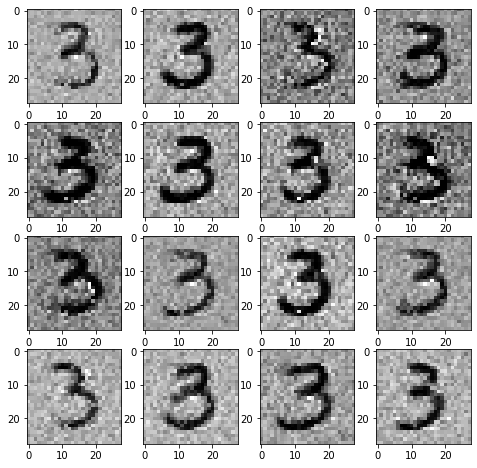


ITER:47000
D_cur_loss:0.025680920109152794
G_cur_loss:7.777834415435791



 96%|█████████▌| 47999/50000 [22:23<00:42, 46.54it/s]

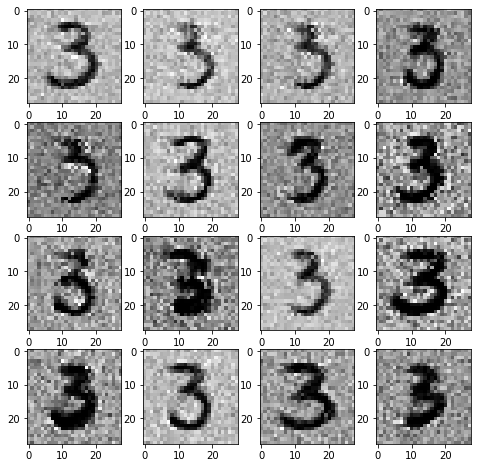


ITER:48000
D_cur_loss:0.012965191155672073
G_cur_loss:7.167405128479004



 98%|█████████▊| 48998/50000 [22:48<00:24, 40.65it/s]

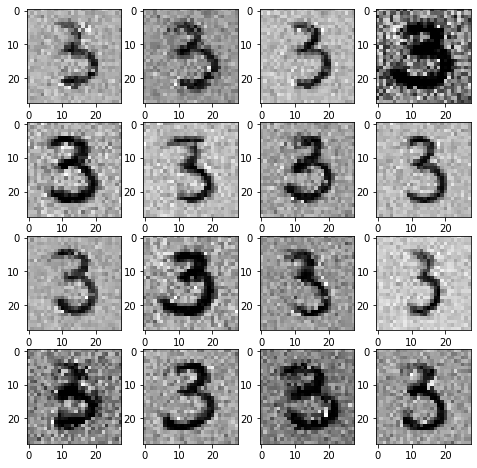


ITER:49000
D_cur_loss:0.043753355741500854
G_cur_loss:6.690189361572266



100%|██████████| 50000/50000 [23:20<00:00, 35.71it/s]


In [10]:
for i in tqdm(range(50000)):
    if i % 1000 == 0:
        example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [128,100])} )
        #fig = show_images(example_1[:24])
        fig=plt.figure(figsize=(8, 8))
        for j in range(1,17):
            fig.add_subplot(4, 4, j)
            plt.imshow(example_1[j].reshape(28,28), cmap='gray_r')
        plt.show()
        print()
    X,_ = mnist.train.next_batch(128)
    _,d_cur_loss = sess.run([D_solver,d_loss],feed_dict = {x:X,z: np.random.uniform(-1,1,size = [128,100])})
    _,g_cur_loss = sess.run([G_solver,g_loss],feed_dict = {z: np.random.uniform(-1,1,size = [128,100])})

    if i % 1000 == 0:
        print('ITER:{}'.format(i))
        print('D_cur_loss:{}'.format(d_cur_loss))
        print('G_cur_loss:{}'.format(g_cur_loss))
        print()